In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
world_cup = pd.read_csv('world_cup_t20_dataset.csv')
results = pd.read_csv('final.csv', index_col = [0])

In [3]:
results.info

<bound method DataFrame.info of             Date        Team_1       Team_2        Winner     Margin  \
0     09-11-2007  South Africa  West Indies  South Africa  8 wickets   
1     09-12-2007         Kenya  New Zealand   New Zealand  9 wickets   
2     09-12-2007      Pakistan     Scotland      Pakistan    51 runs   
3     09-12-2007     Australia     Zimbabwe      Zimbabwe  5 wickets   
4     13-09-2007    Bangladesh  West Indies    Bangladesh  6 wickets   
...          ...           ...          ...           ...        ...   
1456  07-10-2022     Australia  West Indies     Australia    31 runs   
1457  08-10-2022   New Zealand     Pakistan      Pakistan  6 wickets   
1458  09-10-2022         Japan    Indonesia         Japan    64 runs   
1459  09-10-2022   New Zealand   Bangladesh   New Zealand  8 wickets   
1460  09-10-2022     Australia      England       England     8 runs   

            Ground  Winner   
0     Johannesburg      NaN  
1           Durban      NaN  
2           D

In [4]:
n = 1
results = results.iloc[:,:-n]
print(results)

            Date        Team_1       Team_2        Winner     Margin  \
0     09-11-2007  South Africa  West Indies  South Africa  8 wickets   
1     09-12-2007         Kenya  New Zealand   New Zealand  9 wickets   
2     09-12-2007      Pakistan     Scotland      Pakistan    51 runs   
3     09-12-2007     Australia     Zimbabwe      Zimbabwe  5 wickets   
4     13-09-2007    Bangladesh  West Indies    Bangladesh  6 wickets   
...          ...           ...          ...           ...        ...   
1456  07-10-2022     Australia  West Indies     Australia    31 runs   
1457  08-10-2022   New Zealand     Pakistan      Pakistan  6 wickets   
1458  09-10-2022         Japan    Indonesia         Japan    64 runs   
1459  09-10-2022   New Zealand   Bangladesh   New Zealand  8 wickets   
1460  09-10-2022     Australia      England       England     8 runs   

            Ground  
0     Johannesburg  
1           Durban  
2           Durban  
3        Cape Town  
4     Johannesburg  
...      

In [5]:
results.info

<bound method DataFrame.info of             Date        Team_1       Team_2        Winner     Margin  \
0     09-11-2007  South Africa  West Indies  South Africa  8 wickets   
1     09-12-2007         Kenya  New Zealand   New Zealand  9 wickets   
2     09-12-2007      Pakistan     Scotland      Pakistan    51 runs   
3     09-12-2007     Australia     Zimbabwe      Zimbabwe  5 wickets   
4     13-09-2007    Bangladesh  West Indies    Bangladesh  6 wickets   
...          ...           ...          ...           ...        ...   
1456  07-10-2022     Australia  West Indies     Australia    31 runs   
1457  08-10-2022   New Zealand     Pakistan      Pakistan  6 wickets   
1458  09-10-2022         Japan    Indonesia         Japan    64 runs   
1459  09-10-2022   New Zealand   Bangladesh   New Zealand  8 wickets   
1460  09-10-2022     Australia      England       England     8 runs   

            Ground  
0     Johannesburg  
1           Durban  
2           Durban  
3        Cape Town 

In [6]:
results.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
0,09-11-2007,South Africa,West Indies,South Africa,8 wickets,Johannesburg
1,09-12-2007,Kenya,New Zealand,New Zealand,9 wickets,Durban
2,09-12-2007,Pakistan,Scotland,Pakistan,51 runs,Durban
3,09-12-2007,Australia,Zimbabwe,Zimbabwe,5 wickets,Cape Town
4,13-09-2007,Bangladesh,West Indies,Bangladesh,6 wickets,Johannesburg


In [7]:
results.isnull().sum()

Date       0
Team_1     0
Team_2     0
Winner     5
Margin    43
Ground     0
dtype: int64

In [8]:
df = results.dropna()
df.reset_index(drop=True)

,Date,Team_1,Team_2,Winner,Margin,Ground
0,09-11-2007,South Africa,West Indies,South Africa,8 wickets,Johannesburg
1,09-12-2007,Kenya,New Zealand,New Zealand,9 wickets,Durban
2,09-12-2007,Pakistan,Scotland,Pakistan,51 runs,Durban
3,09-12-2007,Australia,Zimbabwe,Zimbabwe,5 wickets,Cape Town
4,13-09-2007,Bangladesh,West Indies,Bangladesh,6 wickets,Johannesburg
...,...,...,...,...,...,...
1410,07-10-2022,Australia,West Indies,Australia,31 runs,Brisbane
1411,08-10-2022,New Zealand,Pakistan,Pakistan,6 wickets,Christchurch
1412,09-10-2022,Japan,Indonesia,Japan,64 runs,Sano
1413,09-10-2022,New Zealand,Bangladesh,New Zealand,8 wickets,Christchurch


In [9]:
df.isnull().sum()

Date      0
Team_1    0
Team_2    0
Winner    0
Margin    0
Ground    0
dtype: int64

In [10]:
df.head()

,Date,Team_1,Team_2,Winner,Margin,Ground
0,09-11-2007,South Africa,West Indies,South Africa,8 wickets,Johannesburg
1,09-12-2007,Kenya,New Zealand,New Zealand,9 wickets,Durban
2,09-12-2007,Pakistan,Scotland,Pakistan,51 runs,Durban
3,09-12-2007,Australia,Zimbabwe,Zimbabwe,5 wickets,Cape Town
4,13-09-2007,Bangladesh,West Indies,Bangladesh,6 wickets,Johannesburg


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1415 non-null   object
 1   Team_1  1415 non-null   object
 2   Team_2  1415 non-null   object
 3   Winner  1415 non-null   object
 4   Margin  1415 non-null   object
 5   Ground  1415 non-null   object
dtypes: object(6)
memory usage: 77.4+ KB


In [12]:
df['Margin'].value_counts

<bound method IndexOpsMixin.value_counts of 0       8 wickets
1       9 wickets
2         51 runs
3       5 wickets
4       6 wickets
          ...    
1456      31 runs
1457    6 wickets
1458      64 runs
1459    8 wickets
1460       8 runs
Name: Margin, Length: 1415, dtype: object>

In [13]:
df.isnull().sum()
df_teams_2010 = df.drop(['Date','Margin', 'Ground'], axis=1)
df_teams_2010
# Dropping columns (Date axis, Margin axis, Ground axis) from dataset

,Team_1,Team_2,Winner
0,South Africa,West Indies,South Africa
1,Kenya,New Zealand,New Zealand
2,Pakistan,Scotland,Pakistan
3,Australia,Zimbabwe,Zimbabwe
4,Bangladesh,West Indies,Bangladesh
...,...,...,...
1456,Australia,West Indies,Australia
1457,New Zealand,Pakistan,Pakistan
1458,Japan,Indonesia,Japan
1459,New Zealand,Bangladesh,New Zealand


In [14]:
name_of_teams=df_teams_2010.loc[:,"Team_1"]



In [15]:
unique_team_names=[]
for i in name_of_teams:
    if i not in unique_team_names:
        unique_team_names.append(i)
print(len(unique_team_names))

98


In [16]:
df['Margin'].unique()

array(['8 wickets', '9 wickets', '51 runs', '5 wickets', '6 wickets',
       '50 runs', '172 runs', 'tied', '7 wickets', '10 runs', '19 runs',
       '33 runs', '5 runs', '64 runs', '18 runs', '10 wickets',
       '4 wickets', '37 runs', '15 runs', '25 runs', '130 runs',
       '48 runs', '82 runs', '1 run', '83 runs', '20 runs', '9 runs',
       '3 runs', '39 runs', '5 wickets(D/L method)', '12 runs', '7 runs',
       '57 runs', '2 wickets', '70 runs', '21 runs', '14 runs', '34 runs',
       '14 runs (D/L method)', '8 wickets (D/L method)',
       '7 runs (D/L method)', '27 runs', '59 runs', '13 runs', '49 runs',
       '81 runs', '11 runs', '3 wickets', '23 runs', '116 runs',
       '32 runs', '17 runs (D/L method)', '90 runs',
       'one-over eliminator', '16 runs', '74 runs', '36 runs', '80 runs',
       '21 runs (D/L method)', '9 runs (D/L Method)', '2 runs', '73 runs',
       '6 runs', '45 runs', '84 runs', '27 runs (D/L method)', '8 runs',
       '8 wickets DLS method', '54 run

In [17]:
# new_df = df[(df['Team_1'] == 'India') | (df['Team_2'] == 'India')]
# india = new_df.iloc[:]
# india.head()

In [18]:
# year = []
# for row in india['Date']:
#     year.append(int(row[7:]))
# india ['match_year']= year
# india_2010 = india[india.match_year >= 10]
# india_2010.count()

In [19]:
# worldcup_teams = ['England', 'South Africa', 'Netherlands', 'Zimbabwe','Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan','Australia', 'Bangladesh', 'India', 'Ireland']
# df_teams_1 = df[df['Team_1'].isin(worldcup_teams)]
# df_teams_2 = df[df['Team_2'].isin(worldcup_teams)]
# df_teams = pd.concat((df_teams_1, df_teams_2))
# df_teams.drop_duplicates()
# df_teams.count()

In [20]:
# df_teams_2010 = df_teams.drop(['Date','Margin', 'Ground'], axis=1)
# df_teams_2010.head()

In [21]:
# df_teams_2010 = df_teams_2010.reset_index(drop=True)
# df_teams_2010.loc[df_teams_2010.Winner == df_teams_2010.Team_1,'winning_team']=1
# df_teams_2010.loc[df_teams_2010.Winner == df_teams_2010.Team_2, 'winning_team']=2
# df_teams_2010 = df_teams_2010.drop(['winning_team'], axis=1)

# df_teams_2010.head()

In [22]:
df_teams_2010

,Team_1,Team_2,Winner
0,South Africa,West Indies,South Africa
1,Kenya,New Zealand,New Zealand
2,Pakistan,Scotland,Pakistan
3,Australia,Zimbabwe,Zimbabwe
4,Bangladesh,West Indies,Bangladesh
...,...,...,...
1456,Australia,West Indies,Australia
1457,New Zealand,Pakistan,Pakistan
1458,Japan,Indonesia,Japan
1459,New Zealand,Bangladesh,New Zealand


In [23]:
df_teams_2010["Winner"]


0       South Africa
1        New Zealand
2           Pakistan
3           Zimbabwe
4         Bangladesh
            ...     
1456       Australia
1457        Pakistan
1458           Japan
1459     New Zealand
1460         England
Name: Winner, Length: 1415, dtype: object

In [24]:
unique_name_winner=df_teams_2010["Winner"]
unique_name_final_val=[]
for i in unique_name_winner:
    if i not in unique_name_final_val:
        unique_name_final_val.append(i)
len(unique_name_final_val)

89

In [25]:
features1=df_teams_2010.loc[:,"Team_1"]
features1
features2=df_teams_2010.loc[:,"Team_2"]
features2

0       West Indies
1       New Zealand
2          Scotland
3          Zimbabwe
4       West Indies
           ...     
1456    West Indies
1457       Pakistan
1458      Indonesia
1459     Bangladesh
1460        England
Name: Team_2, Length: 1415, dtype: object

In [26]:
class_value=df_teams_2010.loc[:,"Winner"]
class_value

0       South Africa
1        New Zealand
2           Pakistan
3           Zimbabwe
4         Bangladesh
            ...     
1456       Australia
1457        Pakistan
1458           Japan
1459     New Zealand
1460         England
Name: Winner, Length: 1415, dtype: object

In [27]:
class_value_not=df_teams_2010.loc[:,"Winner"]

In [28]:
from sklearn.model_selection import permutation_test_score
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [29]:
lb=LabelEncoder()
y1=to_categorical(lb.fit_transform(class_value))# main class value
y1


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
lb=LabelEncoder()
class_value=lb.fit_transform(class_value) # for smoting
class_value

array([73, 53, 58, ..., 38, 53, 22])

In [31]:
lb=LabelEncoder()
features1=lb.fit_transform(features1)
features1

array([86, 50, 70, ..., 48, 63,  2])

In [32]:
lb=LabelEncoder()
features2=lb.fit_transform(features2)
features2

array([93, 59, 73, ..., 38,  7, 25])

In [33]:
len(features2)

1415

In [34]:
features1=list(features1)
features2=list(features2)

In [35]:
ex=[]
ex1=[]
for i in range(len(features1)):
    ex=[]
    ex.append(features1[i])
    ex.append(features2[i])
    ex1.append(ex)
#then collection run

In [36]:
from collections import Counter
class_list=[]
for i in class_value:
    class_list.append(i)
#z=Counter(class_value)
class_list

[73,
 53,
 58,
 88,
 6,
 22,
 75,
 2,
 33,
 75,
 73,
 53,
 2,
 73,
 58,
 53,
 58,
 75,
 73,
 33,
 2,
 58,
 33,
 58,
 33,
 33,
 52,
 53,
 86,
 33,
 73,
 22,
 34,
 75,
 58,
 73,
 75,
 33,
 53,
 73,
 75,
 86,
 73,
 58,
 75,
 22,
 58,
 86,
 75,
 73,
 58,
 75,
 58,
 53,
 86,
 33,
 58,
 33,
 2,
 75,
 86,
 53,
 2,
 73,
 22,
 73,
 2,
 75,
 53,
 22,
 86,
 2,
 58,
 22,
 75,
 2,
 22,
 2,
 22,
 75,
 2,
 33,
 73,
 53,
 22,
 73,
 2,
 58,
 33,
 58,
 47,
 86,
 58,
 2,
 22,
 75,
 2,
 33,
 47,
 75,
 58,
 33,
 75,
 86,
 86,
 6,
 51,
 34,
 52,
 0,
 6,
 88,
 34,
 51,
 31,
 88,
 52,
 33,
 75,
 53,
 58,
 33,
 73,
 75,
 86,
 73,
 22,
 86,
 33,
 53,
 73,
 58,
 33,
 52,
 75,
 2,
 86,
 75,
 33,
 75,
 88,
 0,
 6,
 56,
 88,
 0,
 0,
 68,
 52,
 6,
 53,
 58,
 86,
 75,
 53,
 22,
 33,
 73,
 86,
 2,
 53,
 22,
 33,
 2,
 86,
 53,
 22,
 0,
 33,
 73,
 22,
 86,
 86,
 53,
 53,
 53,
 68,
 0,
 52,
 56,
 0,
 68,
 34,
 31,
 68,
 0,
 34,
 0,
 73,
 75,
 75,
 22,
 33,
 33,
 73,
 75,
 75,
 2,
 0,
 0,
 0,
 58,
 58,
 86,
 58,
 75,
 6,


In [37]:
z=Counter(class_value)

In [38]:
print(z)

Counter({33: 96, 58: 85, 2: 64, 53: 62, 73: 60, 22: 60, 75: 54, 86: 49, 0: 43, 34: 35, 6: 34, 51: 32, 50: 29, 84: 28, 52: 27, 82: 27, 88: 25, 68: 23, 44: 23, 26: 21, 64: 21, 39: 20, 3: 20, 56: 18, 57: 18, 20: 18, 74: 17, 63: 16, 40: 16, 14: 16, 7: 16, 46: 16, 41: 15, 31: 13, 37: 13, 13: 13, 21: 12, 72: 11, 42: 11, 80: 11, 5: 10, 24: 10, 83: 10, 43: 10, 85: 9, 30: 9, 62: 9, 54: 8, 9: 8, 49: 8, 27: 8, 35: 8, 1: 7, 67: 6, 55: 6, 78: 6, 32: 6, 19: 6, 79: 6, 65: 5, 11: 5, 15: 5, 8: 4, 45: 4, 25: 4, 10: 4, 69: 4, 59: 3, 48: 3, 29: 3, 71: 3, 28: 3, 23: 3, 17: 3, 47: 2, 66: 2, 60: 2, 70: 2, 4: 2, 18: 2, 87: 1, 61: 1, 81: 1, 12: 1, 16: 1, 76: 1, 77: 1, 36: 1, 38: 1})


In [39]:
from imblearn.over_sampling import SMOTE
over = SMOTE(sampling_strategy=z)
# #now upper np.array

In [40]:
ex1=np.array(ex1)

In [41]:
class_value=list(class_value)
class_value=np.array(class_value)
print(class_value.shape)

(1415,)


In [42]:

class_value=class_value.reshape(-1,1)

In [43]:
print(ex1.shape)
print(class_value.shape)


(1415, 2)
(1415, 1)


In [44]:
# from collections import Counter
# class_list=[]
# for i in class_value:
#     class_list.append(i)
# #z=Counter(class_value)
# class_list
#over fit sampling

In [45]:
# z=Counter(class_value)

In [46]:
# print(z)

In [47]:
# strategy = {0:100, 1:100, 2:200, 3:200, 4:200, 5:200}

In [48]:
# from imblearn.over_sampling import SMOTE
# over = SMOTE(sampling_strategy=z)
# #now upper np.array


In [49]:
X, y = over.fit_resample(ex1, class_value)

In [50]:
y=np.array(y)
y=y.reshape(-1,1)
print(y.shape)

(1415, 1)


In [51]:
# from sklearn.preprocessing import StandardScaler    
# st_x= StandardScaler()   
# ex1=st_x.fit_transform(ex1)    
# ex1 

In [52]:
# class_value=class_value.reshape(-1,1)
# class_value=st_x.fit_transform(class_value)
# class_value.shape

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.20, random_state=12345)
#X_train, X_test, y_train, y_test = train_test_split(ex1,class_value ,test_size=0.20, random_state=12345)

In [54]:
y_train.shape

(1132, 1)

In [55]:
y_train

array([[ 2],
       [50],
       [86],
       ...,
       [53],
       [88],
       [88]])

In [56]:
final_for=[]
teams,winners=[],[]
for i in range(len(X)):
    teams=[]
    teams.append(X[i][0])
    teams.append(X[i][1])
    teams.append(z[i])
    final_for.append(teams)
print(final_for)

[[86, 93, 43], [50, 59, 7], [70, 73, 64], [2, 95, 20], [7, 93, 2], [25, 95, 10], [50, 81, 34], [2, 25, 16], [41, 64, 4], [63, 81, 8], [86, 7, 4], [41, 59, 5], [2, 7, 1], [86, 25, 13], [70, 81, 16], [25, 59, 5], [2, 64, 1], [7, 81, 3], [86, 59, 2], [25, 37, 6], [2, 81, 18], [7, 64, 12], [86, 37, 60], [63, 64, 3], [2, 37, 10], [41, 64, 4], [25, 58, 21], [63, 73, 8], [2, 93, 3], [7, 37, 3], [81, 79, 9], [25, 64, 13], [7, 39, 6], [2, 81, 96], [62, 64, 35], [63, 79, 8], [88, 93, 1], [41, 39, 13], [44, 59, 1], [27, 79, 20], [70, 81, 16], [42, 93, 15], [86, 93, 11], [63, 64, 10], [44, 81, 23], [25, 37, 4], [44, 64, 16], [27, 93, 2], [63, 81, 3], [41, 79, 8], [70, 79, 29], [88, 93, 32], [70, 81, 27], [64, 81, 62], [96, 39, 8], [0, 37, 6], [7, 64, 18], [41, 79, 18], [2, 64, 85], [88, 95, 3], [96, 25, 2], [63, 95, 1], [2, 7, 9], [0, 79, 16], [25, 64, 21], [63, 79, 5], [2, 37, 2], [96, 81, 6], [63, 64, 23], [25, 79, 4], [96, 37, 2], [2, 81, 3], [70, 79, 11], [25, 59, 60], [41, 81, 17], [96, 3, 54

In [57]:
final_for=np.array(final_for)

In [58]:
final_for_frame=pd.DataFrame(final_for)


In [59]:
final_for_frame.columns=["Team_1","Team_2","Winner"]
final_for_frame
#rf e jabo

,Team_1,Team_2,Winner
0,86,93,43
1,50,59,7
2,70,73,64
3,2,95,20
4,7,93,2
...,...,...,...
1410,2,93,0
1411,63,64,0
1412,48,38,0
1413,63,7,0


In [60]:
#convert team-1 and team-2 from categorical variables to continous inputs 
# Get dummy variables
#final = pd.get_dummies(df_teams_2010, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

# Separate X and y sets
#X = final.drop(['Winner'], axis=1)
# print(X)
#y = final["Winner"]


# Separate train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# from sklearn.preprocessing import StandardScaler    
# st_x= StandardScaler()    
# X_train= st_x.fit_transform(X_train)    
# X_test= st_x.transform(X_test) 

In [61]:
# y_train,y_test=y_train.reshape(-1,1),y_test.reshape(-1,1)

In [62]:
# y_train=st_x.fit_transform(y_train)
# y_test=st_x.fit_transform(y_test)

In [63]:
# print(type(X_train))
# print(X_train)

In [64]:
# model = RandomForestClassifier(n_estimators=500, max_depth=20,random_state=1) 
# # evaluate the model
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
# print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


In [65]:
# model = KNeighborsClassifier()
# # evaluate the model
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
# print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

In [66]:
# model = SVC(kernel='linear', random_state=1)
# # evaluate the model
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
# print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

In [67]:
# model = LogisticRegression(random_state=1)
# # evaluate the model
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
# print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

In [68]:
# store starting time
begin = time.time()
rf = RandomForestClassifier(n_estimators=500,max_depth=22,random_state=148) 
rf.fit(X, y)
end = time.time()
# get_score(rf,X_train,X_test,y_train,y_test)
print(end-begin)


C:\Users\Arnab\AppData\Local\Temp\ipykernel_9708\2875616719.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X, y)


4.375648260116577


In [69]:
from sklearn.metrics import accuracy_score,log_loss 
rf_test = accuracy_score(y_test,rf.predict(X_test))
rf_test

0.8303886925795053

In [70]:
rf_train = accuracy_score(y_train,rf.predict(X_train))
rf_train

0.8206713780918727

In [71]:
y_test.shape

(283, 1)

In [72]:
y_prediction=rf.predict(X_test)

In [73]:
y_pred = rf.predict_proba(X_test)

In [74]:
y_pred

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.07507854, 0.        ,
        0.        ]])

In [75]:
y_test

array([[72],
       [58],
       [44],
       [57],
       [13],
       [20],
       [45],
       [ 6],
       [53],
       [ 6],
       [60],
       [58],
       [82],
       [33],
       [86],
       [72],
       [33],
       [75],
       [44],
       [86],
       [58],
       [39],
       [58],
       [51],
       [53],
       [58],
       [68],
       [79],
       [75],
       [37],
       [58],
       [88],
       [26],
       [51],
       [29],
       [33],
       [ 9],
       [55],
       [29],
       [63],
       [86],
       [31],
       [58],
       [64],
       [58],
       [ 5],
       [86],
       [42],
       [31],
       [53],
       [52],
       [ 2],
       [40],
       [22],
       [22],
       [58],
       [34],
       [33],
       [17],
       [53],
       [33],
       [44],
       [20],
       [58],
       [33],
       [ 7],
       [ 0],
       [13],
       [50],
       [58],
       [22],
       [84],
       [22],
       [58],
       [73],
       [53],
       [86],

In [76]:
# y_test=y_test.reshape(y_test.shape[0]*y_test.shape[1])

In [77]:
print(y_test.shape,y_pred.shape)

(283, 1) (283, 89)


In [78]:
y_test

array([[72],
       [58],
       [44],
       [57],
       [13],
       [20],
       [45],
       [ 6],
       [53],
       [ 6],
       [60],
       [58],
       [82],
       [33],
       [86],
       [72],
       [33],
       [75],
       [44],
       [86],
       [58],
       [39],
       [58],
       [51],
       [53],
       [58],
       [68],
       [79],
       [75],
       [37],
       [58],
       [88],
       [26],
       [51],
       [29],
       [33],
       [ 9],
       [55],
       [29],
       [63],
       [86],
       [31],
       [58],
       [64],
       [58],
       [ 5],
       [86],
       [42],
       [31],
       [53],
       [52],
       [ 2],
       [40],
       [22],
       [22],
       [58],
       [34],
       [33],
       [17],
       [53],
       [33],
       [44],
       [20],
       [58],
       [33],
       [ 7],
       [ 0],
       [13],
       [50],
       [58],
       [22],
       [84],
       [22],
       [58],
       [73],
       [53],
       [86],

In [79]:
# labels=[]
# for i in y_test:
#     if i not in labels:
#         labels.append(i)
# print(labels)

In [80]:
print(y_pred)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.07507854 0.         0.        ]]


In [81]:
from keras.utils import to_categorical
yy=to_categorical(y_test)
yy

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [82]:
yy.shape

(283, 89)

In [252]:
ls=log_loss(yy, y_pred)
ls_rf=ls/10
print(ls_rf)

0.040600463586655984


In [85]:
!pip install scipy


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:

from scipy.stats import chi2_contingency

In [87]:
stat, p, dof, expected = chi2_contingency(y_pred)

In [88]:
print(stat,p,dof,expected)

12039.838631931825 1.0 24816 [[0.01994388 0.00580212 0.03527517 ... 0.03034338 0.00242335 0.00918066]
 [0.01994388 0.00580212 0.03527517 ... 0.03034338 0.00242335 0.00918066]
 [0.01994388 0.00580212 0.03527517 ... 0.03034338 0.00242335 0.00918066]
 ...
 [0.01994388 0.00580212 0.03527517 ... 0.03034338 0.00242335 0.00918066]
 [0.01994388 0.00580212 0.03527517 ... 0.03034338 0.00242335 0.00918066]
 [0.01994388 0.00580212 0.03527517 ... 0.03034338 0.00242335 0.00918066]]


In [89]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


In [90]:
import scipy.stats as stats

In [91]:
print(y_prediction.shape)

(283,)


In [92]:
stats.ttest_ind(a=y_prediction[:140], b=y_prediction[141:282])##283 ==282//2=141 

Ttest_indResult(statistic=-0.310625800428891, pvalue=0.7563170397223529)

In [93]:
print(X_test.shape)

(283, 2)


In [94]:
from sklearn.tree import DecisionTreeClassifier
begin = time.time()
dtree = DecisionTreeClassifier(criterion='gini', random_state=100)
dtree.fit(X,y)
end = time.time()
print(end-begin)

0.011423587799072266


In [95]:
dtree_test = accuracy_score(y_test,dtree.predict(X_test))
dtree_test

0.8445229681978799

In [96]:
dtree_train = accuracy_score(y_train,dtree.predict(X_train))
dtree_train

0.8171378091872792

In [97]:
y_prediction_df=dtree.predict(X_test)

In [98]:
y_pred_df = dtree.predict_proba(X_test)

In [251]:
ls=log_loss(yy, y_pred_df)
ls_df = ls/10
print(ls_df)


0.030701917104709608


In [100]:
# print(y_pred.shape,y_pred)

In [101]:
# stat, p, dof, expected = chi2_contingency(y_pred)

In [102]:
# print(stat,p)

In [103]:
print(y_pred_df.shape,y_pred_df)

(283, 89) [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.07142857 0.         0.        ]]


In [104]:
from sklearn.ensemble import GradientBoostingClassifier
begin = time.time()
model = GradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# model = GradientBoostingClassifier()
model.fit(X, y)
end = time.time()
print(end-begin)

c:\users\arnab\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


57.05098795890808


In [105]:
model_GB_test = accuracy_score(y_test,model.predict(X_test))
model_GB_test

0.5830388692579506

In [106]:
model_GB_train = accuracy_score(y_train,model.predict(X_train))
model_GB_train

0.5962897526501767

In [107]:
y_prediction_GB=model.predict(X_test)
y_pred_GB = model.predict_proba(X_test)

In [250]:
ls=log_loss(yy, y_pred_GB)
ls_GB = ls/10
print(ls_GB)

0.8903112457247655


In [109]:
# stat, p, dof, expected = chi2_contingency(y_pred_GB)

In [110]:
# alpha = 0.05
# print("p value is " + str(p))
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (H0 holds true)')

In [111]:
# stats.ttest_ind(a=y_prediction_GB[:140], b=y_prediction_GB[141:282])

In [112]:
from sklearn.ensemble import HistGradientBoostingClassifier
begin = time.time()
Histclf = HistGradientBoostingClassifier(max_iter=100).fit(X,y)
end = time.time()
print(end-begin)


c:\users\arnab\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


44.70126914978027


In [113]:
Histclf_train = accuracy_score(y_train,Histclf.predict(X_train))
Histclf_train

0.8206713780918727

In [114]:
Histclf_test = accuracy_score(y_test,Histclf.predict(X_test))
Histclf_test

0.8303886925795053

In [115]:
y_prediction_hict=Histclf.predict(X_test)
y_pred_hict = Histclf.predict_proba(X_test)

In [249]:
ls=log_loss(yy, y_pred_hict)
ls_hict = ls/10
print(ls_hict)

0.030760919996895907


In [117]:
# stat, p, dof, expected = chi2_contingency(y_pred_hict)

In [118]:
# alpha = 0.05
# print("p value is " + str(p))
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (H0 holds true)')

In [119]:
# stats.ttest_ind(a=y_prediction_hict[:140], b=y_prediction_hict[141:282])

In [120]:
from sklearn.ensemble import BaggingClassifier
begin = time.time()
bagging = BaggingClassifier(rf).fit(X,y)
end = time.time()
print(end-begin)

c:\users\arnab\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


37.98312067985535


In [121]:
bagging_test = accuracy_score(y_test,bagging.predict(X_test))
bagging_test


0.833922261484099

In [122]:
bagging_train = accuracy_score(y_train,bagging.predict(X_train))
bagging_train

0.8003533568904594

In [123]:
y_prediction_bag=bagging.predict(X_test)
y_pred_bag = bagging.predict_proba(X_test)

In [248]:
ls=log_loss(yy, y_pred_bag)
ls_bag = ls/10
print(ls_bag)

0.05469213683330783


In [125]:
# stat, p, dof, expected = chi2_contingency(y_pred_bag)
# alpha = 0.05
# print("p value is " + str(p))
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (H0 holds true)')

In [126]:
# stats.ttest_ind(a=y_prediction_bag[:140], b=y_prediction_bag[141:282])

In [127]:
from sklearn.ensemble import AdaBoostClassifier
begin = time.time()
ada = AdaBoostClassifier()
ada.fit(X,y)
end = time.time()
print(end-begin)

c:\users\arnab\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.590024471282959


In [128]:
ada_test = accuracy_score(y_test,ada.predict(X_test))
ada_test

0.10600706713780919

In [129]:
ada_train = accuracy_score(y_train,ada.predict(X_train))
ada_train

0.08745583038869258

In [130]:
y_prediction_ada=ada.predict(X_test)
y_pred_ada = ada.predict_proba(X_test)

In [131]:
ls=log_loss(yy, y_pred_ada)
print(ls/10)

0.4256886333171678


In [132]:
stat, p, dof, expected = chi2_contingency(y_pred_ada)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


In [133]:
stats.ttest_ind(a=y_prediction_ada[:140], b=y_prediction_ada[141:282])

Ttest_indResult(statistic=0.04291156529743227, pvalue=0.965802723478399)

In [134]:
from xgboost import XGBClassifier
begin = time.time()
XGB = XGBClassifier()
XGB.fit(X,y)
end = time.time()
print(end-begin)

11.31695294380188


In [135]:
XGB_train = accuracy_score(y_train,XGB.predict(X_train))
XGB_train

0.8215547703180212

In [136]:
XGB_test = accuracy_score(y_test,XGB.predict(X_test))
XGB_test

0.8268551236749117

In [137]:
y_prediction_XGB=XGB.predict(X_test)
y_pred_XGB = XGB.predict_proba(X_test)

In [247]:
ls=log_loss(yy, y_pred_XGB)
ls_XGB = ls/10
print(ls_XGB)

0.0379140040419285


In [139]:
# stat, p, dof, expected = chi2_contingency(y_pred_XGB)
# alpha = 0.05
# print("p value is " + str(p))
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (H0 holds true)')

In [140]:
# stats.ttest_ind(a=y_prediction_XGB[:140], b=y_prediction_XGB[141:282])

In [141]:
estimator = []
estimator.append(('LR', 
                  LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))

In [142]:
from sklearn.ensemble import VotingClassifier
begin = time.time()
vote = VotingClassifier(estimators = estimator, voting = "soft")
vote.fit(X,y)
end = time.time()
print(end-begin)

c:\users\arnab\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\arnab\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\arnab\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternati

4.611025810241699


In [143]:
vote_train = accuracy_score(y_train,vote.predict(X_train))
vote_train

0.8206713780918727

In [144]:
vote_test = accuracy_score(y_test,vote.predict(X_test))
vote_test

0.8303886925795053

In [145]:
y_prediction_vote=vote.predict(X_test)
y_pred_vote = vote.predict_proba(X_test)

In [246]:
ls=log_loss(yy, y_pred_vote)
ls_vote = ls/10
print(ls_vote)

0.11622632555819698


In [147]:
# stat, p, dof, expected = chi2_contingency(y_pred_vote)
# alpha = 0.05
# print("p value is " + str(p))
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (H0 holds true)')

In [148]:
# stats.ttest_ind(a=y_prediction_vote[:140], b=y_prediction_vote[141:282])

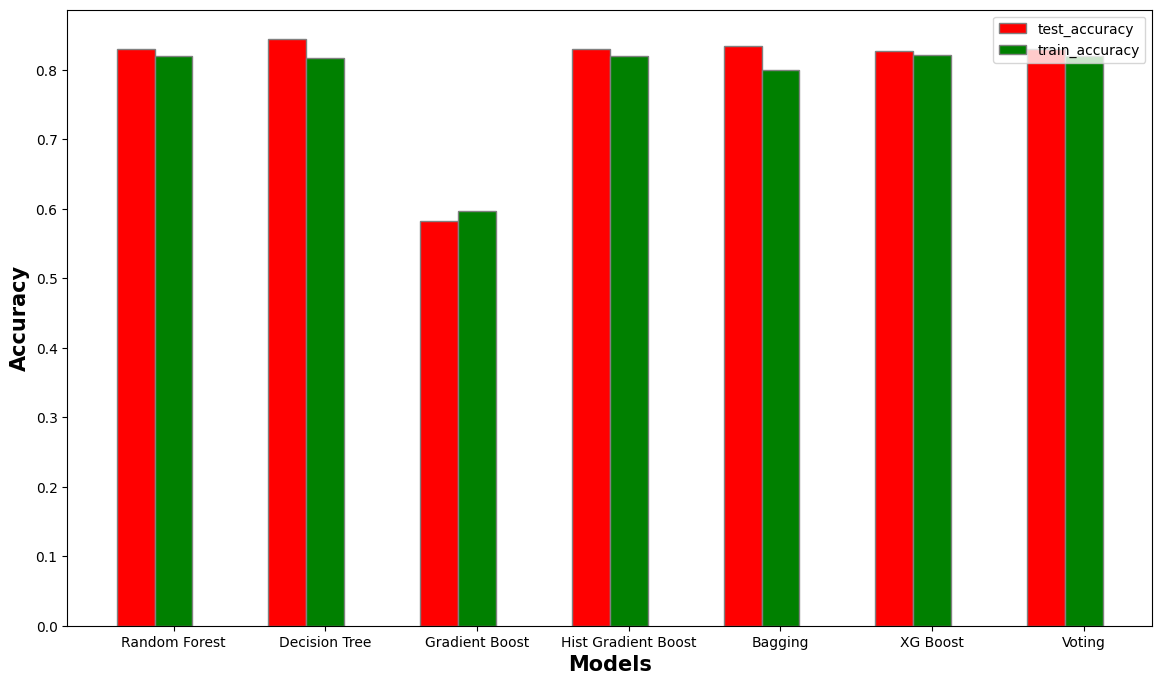

In [253]:

import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(14, 8))

# set height of bar
test_accuracy = [rf_test, dtree_test, model_GB_test,Histclf_test, bagging_test, XGB_test, vote_test]
train_accuracy = [rf_train, dtree_train, model_GB_train, Histclf_train, bagging_train, XGB_train, vote_train]
# CSE = [29, 3, 24, 25, 17]

# Set position of bar on X axis
br1 = np.arange(len(test_accuracy))
br2 = [x + barWidth for x in br1]
# br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, test_accuracy, color ='r', width = barWidth,
		edgecolor ='grey', label ='test_accuracy')
plt.bar(br2, train_accuracy, color ='g', width = barWidth,
		edgecolor ='grey', label ='train_accuracy')
# plt.bar(br3, CSE, color ='b', width = barWidth,
# 		edgecolor ='grey', label ='CSE')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(test_accuracy))],
		['Random Forest', 'Decision Tree', 'Gradient Boost', 'Hist Gradient Boost', 'Bagging', 'XG Boost', 'Voting'])
# plt.set_xticklabels(plt.get_xticklabels(), rotation=90)

plt.legend()
plt.show()


In [ ]:
rotation=90

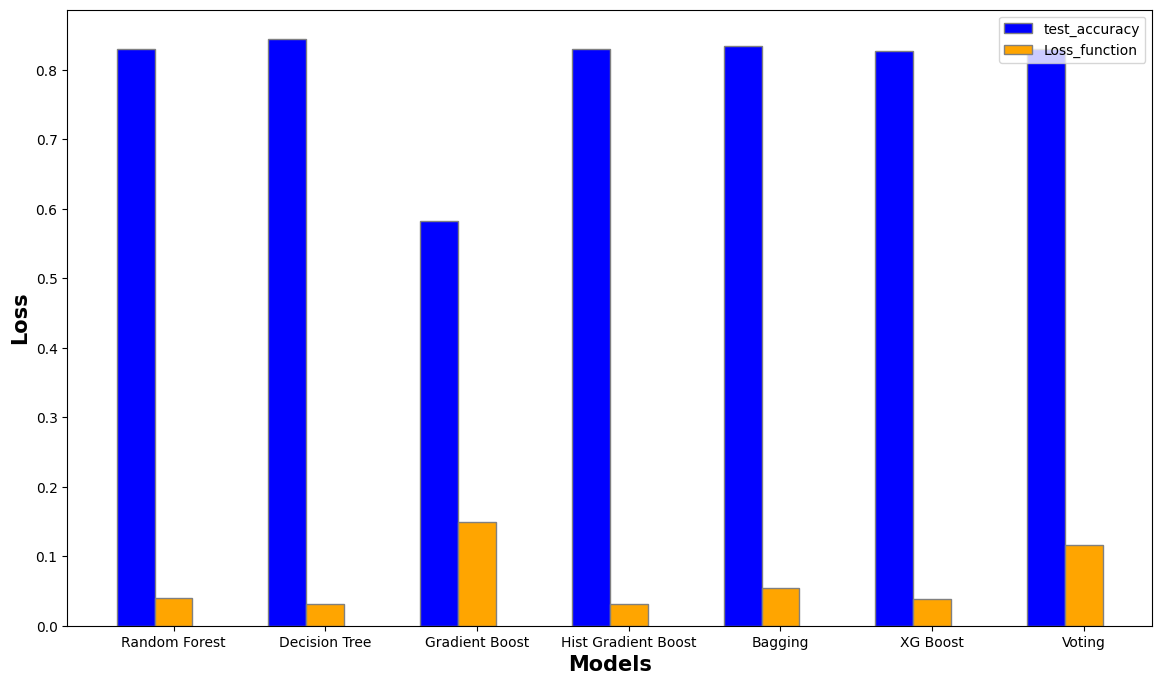

In [298]:

import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(14, 8))

# set height of bar
test_accuracy = [rf_test, dtree_test, model_GB_test,Histclf_test, bagging_test, XGB_test, vote_test]
loss_list = [ls_rf,ls_df,0.15,ls_hict,ls_bag,ls_XGB,ls_vote]
# CSE = [29, 3, 24, 25, 17]

# Set position of bar on X axis
br1 = np.arange(len(test_accuracy))
br2 = [x + barWidth for x in br1]
# br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, test_accuracy, color ='blue', width = barWidth,
		edgecolor ='grey', label ='test_accuracy')
plt.bar(br2, loss_list, color ='orange', width = barWidth,
		edgecolor ='grey', label ='Loss_function')
# plt.bar(br3, CSE, color ='b', width = barWidth,
# 		edgecolor ='grey', label ='CSE')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Loss', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(test_accuracy))],
		['Random Forest', 'Decision Tree', 'Gradient Boost', 'Hist Gradient Boost', 'Bagging', 'XG Boost', 'Voting'])
# plt.set_xticklabels(plt.get_xticklabels(), rotation=90)

plt.legend()
plt.show()


Text(0, 0.5, 'Loss')

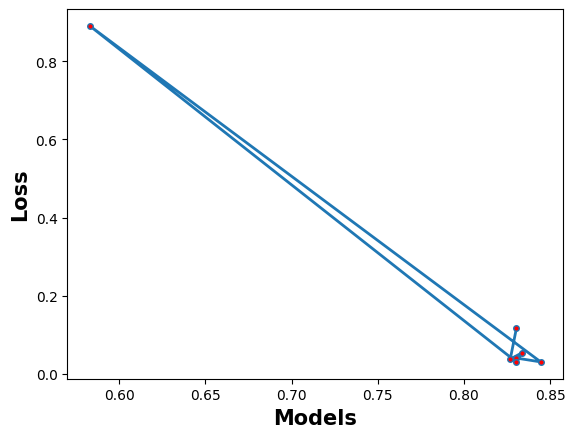

In [293]:
l = 0.001
test_accuracy = [rf_test, dtree_test, model_GB_test,Histclf_test, bagging_test, XGB_test, vote_test]
loss_list = [ls_rf,ls_df,ls_GB,ls_hict,ls_bag,ls_XGB,ls_vote]
plt.plot(test_accuracy,loss_list,linewidth=2, marker ='.',markersize = 8, mfc = 'r')
plt.xlabel('Models',fontweight ='bold', fontsize = 15)
plt.ylabel('Loss', fontweight ='bold', fontsize = 15)
# plt.xticks([r for r in range(len(test_accuracy))],
# 		['Random Forest', 'Decision Tree', 'Gradient Boost', 'Hist Gradient Boost', 'Bagging', 'XG Boost', 'Voting'],rotation=45)

In [150]:
# from catboost import CatBoostClassifier
# cat_model = CatBoostClassifier(learning_rate=1)
# # Fit model
# cat_model.fit(X,y)

In [151]:
# cat_model.score(X_train,y_train)

In [152]:
# from sklearn.svm import SVC
# sv=SVC(kernel="poly",gamma=1.0,C=1,degree=3)
# sv.fit(X,y)

In [153]:
# print(accuracy_score(y_test,sv.predict(X_test)))

In [154]:
# from numpy.random import normal
# from scipy.stats import mode

In [155]:
# GB = MultinomialNB() 
# GB.fit(X_train, y_train)
# # get_score(rf,X_train,X_test,y_train,y_test)
# score = GB.score(X_train, y_train)
# score2 = GB.score(X_test, y_test)
# print("Training set accuracy: ", '%.3f'%(score)) 
# print("Test set accuracy: ", '%.3f'%(score2))

In [156]:
begin = time.time()
classifier= KNeighborsClassifier(n_neighbors=2)  
classifier.fit(X,y)
end = time.time()
print(end-begin)
# score = classifier.score(X_train, y_train)
# score2 = classifier.score(X_test, y_test)
# print("Training set accuracy: ", '%.3f'%(score)) 
# print("Test set accuracy: ", '%.3f'%(score2))

0.005009889602661133


c:\users\arnab\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [157]:
print(accuracy_score(y_test,classifier.predict(X_test)))

0.7208480565371025


In [158]:
print(accuracy_score(y_train,classifier.predict(X_train)))

0.6925795053003534


In [159]:
y_prediction_kn=classifier.predict(X_test)
y_pred_kn = classifier.predict_proba(X_test)

In [160]:
ls=log_loss(yy, y_pred_kn)
print(ls/10)

0.2747063340877144


In [161]:
# stat, p, dof, expected = chi2_contingency(y_pred_kn)
# alpha = 0.05
# print("p value is " + str(p))
# if p <= alpha:
#     print('Dependent (reject H0)')
# else:
#     print('Independent (H0 holds true)')

In [162]:
#  # "Support vector classifier"  
# classifier_svc = SVC(kernel='linear', random_state=1)  
# classifier_svc.fit(X_train, y_train)
# score = classifier_svc.score(X_train, y_train)
# score2 = classifier_svc.score(X_test, y_test)
# print("Training set accuracy: ", '%.3f'%(score)) 
# print("Test set accuracy: ", '%.3f'%(score2))

In [163]:
# LR = LogisticRegression(random_state=1) 
# LR.fit(X_train, y_train)
# # get_score(rf,X_train,X_test,y_train,y_test)
# score = LR.score(X_train, y_train)
# score2 = LR.score(X_test, y_test)
# print("Training set accuracy: ", '%.3f'%(score)) 
# print("Test set accuracy: ", '%.3f'%(score2))

In [164]:
#adding ICC rankings
#the team which is positioned higher on the ICC Ranking will be considered "favourite" for the match
#and therefore, will be positioned under the "Team_1" column

# Loading new datasets
ranking = pd.read_csv('icc_rankings.csv') 
fixtures = pd.read_csv('fixtures.csv')

# List for storing the group stage games
pred_set = []

In [165]:
# fixtures.insert(1, 'first_position', fixtures['Team_1'].map(ranking.set_index('Team')['Position']))
# fixtures.insert(2, 'second_position', fixtures['Team_2'].map(ranking.set_index('Team')['Position']))


In [166]:
ranking1=ranking
ranking1

,Position,Team,Points
0,1,India,"14,760"
1,2,England,"11,063\t"
2,3,Pakistan,"12,415\t"
3,4,South Africa,"9,544\t"
4,5,New Zealand,"10,865\t"
5,6,Australia,"10,554\t"
6,8,Sri Lanka\t,"9,964"
7,9,Bangladesh\t,"10,220\t"
8,10,Afghanistan\t,"5,919\t"
9,11,Zimbabwe\t,"7,555\t"


In [167]:
#ranking_team=[]
"""
for i in ranking["Team"]:
    
    s_name=unique_name_final_val.index(i)
    ranking_team.append(s_name)
ranking_team
"""
for i in range(len(unique_name_final_val)):
    unique_name_final_val[i]=unique_name_final_val[i].replace(" ","")
# fixtures = fixtures.iloc[:42, :]
# fixtures.tail()
ranking.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=[" ",""], regex=True, inplace=True)

In [168]:
ranking_list=[]
for i in ranking["Team"]:
    ranking_list.append(i.replace(" ",""))
ranking_list

['India',
 'England',
 'Pakistan',
 'SouthAfrica',
 'NewZealand',
 'Australia',
 'SriLanka',
 'Bangladesh',
 'Afghanistan',
 'Zimbabwe',
 'Ireland',
 'Netherlands']

In [169]:

# ranking1.drop([12], inplace = True)
ranking1

,Position,Team,Points
0,1,India,"14,760"
1,2,England,"11,063"
2,3,Pakistan,"12,415"
3,4,South Africa,"9,544"
4,5,New Zealand,"10,865"
5,6,Australia,"10,554"
6,8,Sri Lanka,"9,964"
7,9,Bangladesh,"10,220"
8,10,Afghanistan,"5,919"
9,11,Zimbabwe,"7,555"


In [170]:
len(ranking_list)

12

In [171]:
ranking_team=[]
for i in ranking_list:
    if i!="UAE":
        s_name=unique_name_final_val.index(i)
        ranking_team.append(s_name)
ranking_team

[8, 5, 2, 0, 1, 7, 6, 4, 14, 3, 11, 9]

In [172]:
len(ranking_team)

12

In [173]:
ranking1["Team"]=ranking_team

In [174]:
ranking1

,Position,Team,Points
0,1,8,"14,760"
1,2,5,"11,063"
2,3,2,"12,415"
3,4,0,"9,544"
4,5,1,"10,865"
5,6,7,"10,554"
6,8,6,"9,964"
7,9,4,"10,220"
8,10,14,"5,919"
9,11,3,"7,555"


In [175]:
# fixtures.isnull().sum()

In [176]:
# ranking

In [177]:
# ranking.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)


In [178]:
# ranking

In [179]:
# fixtures.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)

In [180]:
# fixtures['Team_1'].unique()

In [181]:
# fixtures['Team_2'].unique()

In [182]:
# # for i in fixtures['Team_1']:
# fixtures['Team_1'] = fixtures['Team_1'].str.strip()
# fixtures['Team_2'] = fixtures['Team_2'].str.strip()
# ranking['Team'] = ranking['Team'].str.strip()

In [183]:

# fixtures.insert(1, 'first_position', fixtures['Team_1'].map(ranking.set_index('Team')['Position']))
# fixtures.insert(2, 'second_position', fixtures['Team_2'].map(ranking.set_index('Team')['Position']))

In [184]:
# fixtures.isnull().sum()

In [185]:
# fixtures

In [186]:
# fixtures = fixtures.iloc[:42, :]
# fixtures.tail()

In [187]:
# fixtures

In [188]:
# for index, row in fixtures.iterrows():
#     if row['first_position'] < row['second_position']:
#         pred_set.append({'Team_1': row['Team_1'], 'Team_2': row['Team_2'], 'winning_team': None})
#     else:
#         pred_set.append({'Team_1': row['Team_2'], 'Team_2': row['Team_1'], 'winning_team': None})
        
# pred_set = pd.DataFrame(pred_set)
# backup_pred_set = pred_set
# pred_set.head()

prediction

In [189]:
# features1_pred=pred_set.loc[:,"Team_1"]
# features2_pred=pred_set.loc[:,"Team_2"]

In [190]:
# lb=LabelEncoder()
# features1_pred=lb.fit_transform(features1_pred)
# print(len(features1_pred))

In [191]:
# lb=LabelEncoder()
# features2_pred=lb.fit_transform(features2_pred)
# print(len(features2_pred))

In [192]:
# ex_pred=[]
# ex1_pred=[]
# for i in range(len(features1_pred)):
#     ex_pred=[]
#     ex_pred.append(features1_pred[i])
#     ex_pred.append(features2_pred[i])
#     ex1_pred.append(ex_pred)


converting into string

In [193]:
# print(len(ex1_pred))

In [194]:
# m1=set(class_value_not)

In [195]:
# m1=list(m1)

In [196]:
# pr=rf.predict(ex1_pred)
# # for i in pr:
#     print(m1[i])

In [197]:
# Get dummy variables and drop winning_team column
# pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

# # Add missing columns compared to the model's training dataset
# missing_cols = set(final.columns) - set(pred_set.columns)
# for c in missing_cols:
#     pred_set[c] = 0
# pred_set = pred_set[final.columns]


# pred_set = pred_set.drop(['Winner'], axis=1)
# pred_set.head()

In [198]:
# predictions = classifier.predict(pred_set)
# for i in range(fixtures.shape[0]):
#     print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
#     if predictions[i] == 1:
#         print("Winner: " + backup_pred_set.iloc[i, 1])
    
#     else:
#         print("Winner: " + backup_pred_set.iloc[i, 0])
#     print("")

In [199]:
#group matches 
# predictions = rf.predict(ex1_pred)
# ctr = 0
# winner = []
# for i in range(fixtures.shape[0]):
#     print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
#     if predictions[i] == 1:
#         team =  backup_pred_set.iloc[i, 1]
#         print("Winner: " + backup_pred_set.iloc[i, 1])
#         winner.append(team)
# #         ctr = winn[team]
# #         winn[team] = ctr + 1
#     else:
#         print("Winner: " + backup_pred_set.iloc[i, 0])
#         winner.append(backup_pred_set.iloc[i, 0])
#     print("")

In [200]:
# winner

In [201]:
# worldcup_teams = ['England', 'South Africa', 'Netherlands', 'Zimbabwe','Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan','Australia', 'Bangladesh', 'India', 'Ireland']

In [202]:
# dct = {}
# for i in worldcup_teams:
#     ctr = winner.count(i)
#     dct[i] = ctr

# dct

In [203]:
# ranking

# from collections import OrderedDict
# lst = OrderedDict(sorted(dct.items()))

# # for i in dct:
# lst   
# sorted_value_index = np.argsort(dct.values())
# dictionary_keys = list(dct.keys())
# sorted_dict = {dictionary_keys[i]: sorted(
#     dct.values())[i] for i in range(len(dictionary_keys))}

# print(sorted_dict)
# res = OrderedDict(reversed(list(sorted_dict.items())))
# res
# import itertools
# res = dict(itertools.islice(res.items(), 4))

# res

# res = dict(reversed(list(sorted_dict.items())))
# print(res)

In [204]:
# from collections import OrderedDict
 
# dict = {'ravi': '10', 'rajnish': '9',
#         'sanjeev': '15', 'yash': '2', 'suraj': '32'}
# dict1 = OrderedDict(sorted(dct.items()))
# print(dict1)

In [205]:
# dict1 = {1: 1, 2: 9, 3: 4}
# sorted_values = sorted(dct.values(),reverse=True) # Sort the values
# sorted_dict = {}

# for i in sorted_values:
#     for k in dct.keys():
#         if dct[k] == i:
#             sorted_dict[k] = dct[k]

# print(sorted_dict)

In [206]:
# import itertools
# res = dict(itertools.islice(sorted_dict.items(), 4))
# res

In [207]:
# semi = []
# for i in res.keys():
#     semi.append(i)
# semi


In [208]:
# final_semi = [('India', 'England'),('Sri Lanka','Pakistan')]

In [209]:
# india=unique_name_final_val.index("India")
# pakistan=unique_name_final_val.index("Pakistan")
# England=unique_name_final_val.index("England")
# Srilanka=unique_name_final_val.index("Srilanka")

In [210]:
# clean_and_predict(semi, ranking, final, rf)
# final_semi=[(india,England),(Srilanka,pakistan)]

In [211]:
# ranking

In [212]:
# new_dict= {}
# for i in semi:
#     new_dict[i] = ranking[Team]('Postion')

In [213]:
# dicti = {}
# for i in semi:
#     select = ranking.loc[ranking['Team'] == i]
# #     print(select)
#     dicti[select["Position"]] = ranking.loc[ranking['Team'] == i]
    
# dicti

In [214]:
# for (columnName, columnData) in ranking.iteritems():
    
#     print('Colunm Name : ', columnName)
#     print('Column Contents : ', columnData.values)
#     if(columnName=="Position"):
#         d

In [215]:
# pred_set

In [216]:
# m=[]
# m1=[]
# m2=[]
# for i in range(len(final_semi)):
#     if final_semi[i][0] in 


In [217]:
# ranking1

In [218]:
# def clean_and_predict(matches, ranking, final, logreg):

#     # Initialization of auxiliary list for data cleaning
#     positions = []

#     # Loop to retrieve each team's position according to ICC ranking
#     for match in matches:
#         positions.append(ranking.loc[ranking['Team'] == match[0],'Position'].iloc[0])
#         positions.append(ranking.loc[ranking['Team'] == match[1],'Position'].iloc[0])
    
#     # Creating the DataFrame for prediction
#     pred_set = []

#     # Initializing iterators for while loop
#     i = 0
#     j = 0

#     # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
#     while i < len(positions):
#         dict1 = {}

#         # If position of first team is better then this team will be the 'Team_1' team, and vice-versa
#         if positions[i] < positions[i + 1]:
#             dict1.update({'Team_1': matches[j][0], 'Team_2': matches[j][1]})
#         else:
#             dict1.update({'Team_1': matches[j][1], 'Team_2': matches[j][0]})

#         # Append updated dictionary to the list, that will later be converted into a DataFrame
#         pred_set.append(dict1)
#         i += 2
#         j += 1
        
#         # Convert list into DataFrame
#     pred_set = pd.DataFrame(pred_set)
#     backup_pred_set = pred_set

#     # Get dummy variables and drop winning_team column
#     pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

#     # Add missing columns compared to the model's training dataset
#     missing_cols2 = set(final.columns) - set(pred_set.columns)
#     for c in missing_cols2:
#         pred_set[c] = 0
#     pred_set = pred_set[final.columns]

#     pred_set = pred_set.drop(['Winner'], axis=1)
#     # Predict!
#     predictions = logreg.predict(pred_set)
#     for i in range(len(pred_set)):
#         print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
#         if predictions[i] == 1:
#             print("Winner: " + backup_pred_set.iloc[i, 1])
#         else:
#             print("Winner: " + backup_pred_set.iloc[i, 0])
#         print("")

In [219]:
# clean_and_predict(final_semi, ranking1, final_for_frame, rf)

In [220]:
# final_for_frame

In [221]:
# final_two_teams=final_for_frame[["Team_1","Team_2"]].copy()
# final_two_teams

In [222]:
# print(rf.predict(final_two_teams))
# next_finals=rf.predict(final_two_teams)

In [223]:
# next_team1=next_finals[:707]
# next_team2=next_finals[707:1414]
# next_team_dataframe=pd.DataFrame()
# next_team_dataframe["Team_1"]=next_team1
# next_team_dataframe["Team_2"]=next_team2
# more_next=rf.predict(next_team_dataframe)

In [224]:
# next_team1=more_next[:352]
# next_team2=more_next[352:704]
# next_team_dataframe=pd.DataFrame()
# next_team_dataframe["Team_1"]=next_team1
# next_team_dataframe["Team_2"]=next_team2
# more_next1=rf.predict(next_team_dataframe)
# print(len(more_next1))

In [225]:
# next_team1=more_next1[:176]
# next_team2=more_next1[176:352]
# next_team_dataframe=pd.DataFrame()
# next_team_dataframe["Team_1"]=next_team1
# next_team_dataframe["Team_2"]=next_team2
# more_next2=rf.predict(next_team_dataframe)
# print(len(more_next2))

In [226]:
# next_team1=more_next2[:88]
# next_team2=more_next2[88:176]
# next_team_dataframe=pd.DataFrame()
# next_team_dataframe["Team_1"]=next_team1
# next_team_dataframe["Team_2"]=next_team2
# more_next3=rf.predict(next_team_dataframe)
# print(len(more_next3))

In [227]:
# next_team1=more_next3[:44]
# next_team2=more_next3[44:88]
# next_team_dataframe=pd.DataFrame()
# next_team_dataframe["Team_1"]=next_team1
# next_team_dataframe["Team_2"]=next_team2
# more_next4=rf.predict(next_team_dataframe)
# print(len(more_next4))

In [228]:
# next_team1=more_next4[:22]
# next_team2=more_next4[22:44]
# next_team_dataframe=pd.DataFrame()
# next_team_dataframe["Team_1"]=next_team1
# next_team_dataframe["Team_2"]=next_team2
# more_next5=rf.predict(next_team_dataframe)
# print(len(more_next5))

In [229]:
# print(more_next5)
# for i in more_next5:
#     print(unique_name_final_val[i])
    

In [230]:
# next_team1=more_next5[:11]
# next_team2=more_next5[11:22]
# next_team_dataframe=pd.DataFrame()
# next_team_dataframe["Team_1"]=next_team1
# next_team_dataframe["Team_2"]=next_team2
# more_next6=rf.predict(next_team_dataframe)
# print(len(more_next6))

In [231]:
# next_team1=more_next6[:5]
# next_team2=more_next6[5:10]
# next_team_dataframe=pd.DataFrame()
# next_team_dataframe["Team_1"]=next_team1
# next_team_dataframe["Team_2"]=next_team2
# more_next7=rf.predict(next_team_dataframe)
# print(len(more_next7))

In [232]:
# print(more_next7)
# unique_name_final_val[19]

In [233]:
# next_team1=more_next7[:2]
# next_team2=more_next7[2:4]
# next_team_dataframe=pd.DataFrame()
# next_team_dataframe["Team_1"]=next_team1
# next_team_dataframe["Team_2"]=next_team2
# more_next8=rf.predict(next_team_dataframe)
# print(len(more_next8))

In [234]:
# next_team1=more_next8[:1]
# next_team2=more_next8[1:2]
# next_team_dataframe=pd.DataFrame()
# next_team_dataframe["Team_1"]=next_team1
# next_team_dataframe["Team_2"]=next_team2
# more_next9=rf.predict(next_team_dataframe)
# print(len(more_next9))

In [235]:
# more_next9
# print(unique_name_final_val[14])

In [236]:
ranking_list
print(ranking_list,ranking_team)
#NewZeland, England, Australia, Srilanka, Ireland, Afganistan, India, Pakistan, SAF, Netharland, Bangladesh, WestIndies

['India', 'England', 'Pakistan', 'SouthAfrica', 'NewZealand', 'Australia', 'SriLanka', 'Bangladesh', 'Afghanistan', 'Zimbabwe', 'Ireland', 'Netherlands'] [8, 5, 2, 0, 1, 7, 6, 4, 14, 3, 11, 9]


In [237]:
new_team1=ranking_team[:6]
new_team2=ranking_team[6:12]
final_for_frame_new=pd.DataFrame()
final_for_frame_new["Team_1"]=new_team1
final_for_frame_new["Team_2"]=new_team2
finals=rf.predict(final_for_frame_new)
print(len(finals),finals)

6 [7 7 2 0 9 4]


c:\users\arnab\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [238]:
new_team1=finals[:2]
new_team2=finals[1:3]
final_for_frame_new=pd.DataFrame()
final_for_frame_new["Team_1"]=new_team1
final_for_frame_new["Team_2"]=new_team2
finals1=rf.predict(final_for_frame_new)
print(len(finals1),finals1)

c:\users\arnab\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


2 [2 6]


In [239]:
new_team1=finals1[:1]
new_team2=finals1[1:2]
final_for_frame_new=pd.DataFrame()
final_for_frame_new["Team_1"]=new_team1
final_for_frame_new["Team_2"]=new_team2
finals2=rf.predict(final_for_frame_new)
print(len(finals2),finals2)

c:\users\arnab\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


1 [2]


In [240]:
print("the winner is ",ranking_list[finals2[0]-1])

the winner is  England


In [241]:
# finals_team = [('India', 'Pakistan')]

In [242]:
# clean_and_predict(finals_team, ranking,X, rf)

In [243]:
# ranking

In [244]:
# unique_team_names
# final_for_frame